# In this notebook we will be to measure sampling error the data set about basketball players in WNBA (Women's National Basketball Association), and contains general information about players, along with their metrics for the season 2016-2017

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

In [3]:
wnba = pd.read_csv("data/wnba.csv")

In [5]:
wnba.columns

Index(['Name', 'Team', 'Pos', 'Height', 'Weight', 'BMI', 'Birth_Place',
       'Birthdate', 'Age', 'College', 'Experience', 'Games Played', 'MIN',
       'FGM', 'FGA', 'FG%', '15:00', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS', 'DD2', 'TD3'],
      dtype='object')

In [6]:
wnba.shape

(143, 32)

In [7]:
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


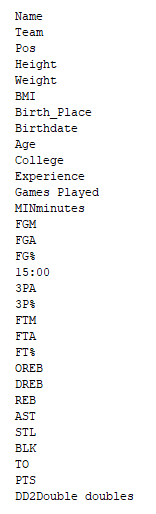

In [17]:
# Columns description
Image("image/description.png")

In [19]:
# Get the maximum value from 'ames Played' column
parameter = wnba['Games Played'].max()

# Using the 'Series.sample' method to get the 30 players randomly
sample = wnba['Games Played'].sample(30)

# Findind the maximum number of games
statistic = sample.max()

# Measure the sample eror
# When we sample we want to minimize the sampling error as much as possible.
# We want our sample to mirror the population as closely as possible.
sampling_error = parameter - statistic

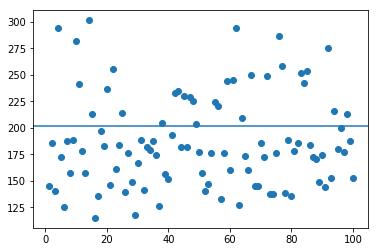

In [22]:
# Show the discrepancy between a parameter and its corresponding statistics

# Crate a list
sample_means = []

# Masure the 'PTS' column
population_mean = wnba['PTS'].mean()

# Display the discrepancy between the parameter of interest and the statistics
for i in range(100):
    sample = wnba['PTS'].sample(10, random_state = i)
    sample_means.append(sample.mean()) # append to the list
    
# Plor 100 sample using scatter.plot
plt.scatter(range(1,101), sample_means) # using integers from 1 to 100 to designate the sample number
plt.axhline(population_mean)

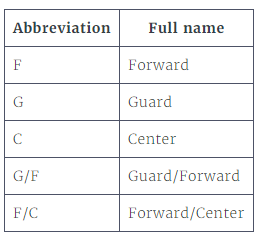

In [24]:
# Show the positions abbreviations
Image("image/positions.png")

In [25]:
wnba['Pts_per_game'] = wnba['PTS'] / wnba['Games Played']

# Stratifying the data in five strata
stratum_G = wnba[wnba.Pos == 'G']
stratum_F = wnba[wnba.Pos == 'F']
stratum_C = wnba[wnba.Pos == 'C']
stratum_GF = wnba[wnba.Pos == 'G/F']
stratum_FC = wnba[wnba.Pos == 'F/C']

points_per_position = {}

# Find the mean points per game using the sample. Use the new column you've created earlier
# Find a way to store the mean along with its corresponding position. You can use a dictionary
for stratum, position in [(stratum_G, 'G'), (stratum_F, 'F'), (stratum_C, 'C'),
                (stratum_GF, 'G/F'), (stratum_FC, 'F/C')]:
    sample = stratum['Pts_per_game'].sample(10, random_state = 0)
    points_per_position[position] = sample.mean()
    
position_most_points = max(points_per_position, key = points_per_position.get)

In [26]:
# Show the minimun games
wnba['Games Played'].min()

2

In [27]:
# Show the maximun games
wnba['Games Played'].max()

32

In [28]:
wnba['Games Played'].value_counts(bins = 3, normalize = True) * 100

(22.0, 32.0]     72.727273
(12.0, 22.0]     18.181818
(1.969, 12.0]     9.090909
Name: Games Played, dtype: float64

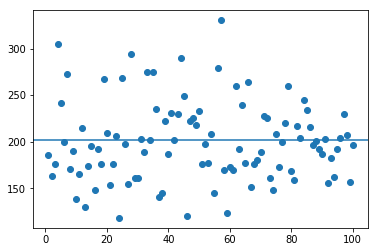

In [30]:
under_12 = wnba[wnba['Games Played'] <= 12]
btw_13_22 = wnba[(wnba['Games Played'] > 12) & (wnba['Games Played'] <= 22)] 
over_23 = wnba[wnba['Games Played'] > 22]

proportional_sampling_means = []

# Sample each stratum proportionally. Sample at random: one sample observation from the first stratum,
# two sample observations from the second, and seven sample observations from the third stratum
for i in range(100):
    sample_under_12 = under_12['PTS'].sample(1, random_state = i)
    sample_btw_13_22 = btw_13_22['PTS'].sample(2, random_state = i)
    sample_over_23 = over_23['PTS'].sample(7, random_state = i)
    
    final_sample = pd.concat([sample_under_12, sample_btw_13_22, sample_over_23])
    proportional_sampling_means.append(final_sample.mean())

# Display the sampling means on a scatter plo
plt.scatter(range(1,101), proportional_sampling_means)
plt.axhline(wnba['PTS'].mean())

In [33]:
# Show the unique value from 'Team' column
wnba['Team'].unique()

array(['DAL', 'LA', 'CON', 'SAN', 'MIN', 'SEA', 'PHO', 'CHI', 'WAS', 'NY',
       'ATL', 'IND'], dtype=object)

In [35]:
# Clustering the values and get 4 sample
pd.Series(wnba['Team'].unique()).sample(4)

9      NY
2     CON
11    IND
8     WAS
dtype: object

In [37]:
# Simulate a cluster sampling
clusters = pd.Series(wnba['Team'].unique()).sample(4, random_state = 0)

sample = pd.DataFrame()

for cluster in clusters:
    data_collected = wnba[wnba['Team'] == cluster]
    sample = sample.append(data_collected)

# Assign the errors to the following variables
sampling_error_height = wnba['Height'].mean() - sample['Height'].mean()
sampling_error_age = wnba['Age'].mean() - sample['Age'].mean()
sampling_error_BMI = wnba['BMI'].mean() - sample['BMI'].mean()
sampling_error_points = wnba['PTS'].mean() - sample['PTS'].mean()

In [45]:
print("sampling_error_height: ", sampling_error_height)
print("sampling_error_age: ", sampling_error_age)
print("sampling_error_BMI: ", sampling_error_BMI)
print("sampling_error_points: ", sampling_error_points)

sampling_error_height:  -0.06400121617511445
sampling_error_age:  -1.401337792642142
sampling_error_BMI:  0.23095444165950596
sampling_error_points:  -27.79674673152934
